In [1]:
from sklearn import mixture, cluster, manifold
from sklearn.manifold import TSNE, Isomap
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, MiniBatchKMeans
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.decomposition import PCA, SparsePCA, NMF, FastICA, MiniBatchNMF, LatentDirichletAllocation, KernelPCA
from sklearn.preprocessing import MinMaxScaler, minmax_scale, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import kneighbors_graph, NeighborhoodComponentsAnalysis
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics

from umap import UMAP
import hdbscan

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import pandas as pd
import numpy as np
from numpy import genfromtxt

import seaborn as sns
import matplotlib.cm as cm
from matplotlib import offsetbox

sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
get_ipython().run_line_magic('matplotlib', 'inline')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from scipy.cluster.hierarchy import dendrogram, linkage ,fcluster
from collections import Counter
from sklearn import preprocessing
import itertools
import random
from scipy.spatial import distance as ssd
from tqdm import tqdm
import scipy
import scipy.sparse 
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph 
from scipy.sparse.linalg import expm
from scipy.linalg import solve_banded
from scipy.spatial.distance import pdist
import scipy.spatial.distance
from sklearn.metrics.pairwise import euclidean_distances
import math
from collections import Counter
import sklearn
import os.path

import scipy.sparse as sp
from scipy.sparse.linalg import eigsh
from sklearn.cluster import k_means

from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.cluster import AffinityPropagation

from time import time

plt.ion()
plt.show()

2022-11-23 14:07:27.387001: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/unimelb.edu.au/lcampoli/Downloads/tcl8.6.12-src/install/lib:/home/unimelb.edu.au/lcampoli/OpenFOAM/ThirdParty-7/platforms/linux64Gcc/gperftools-svn/lib:/home/unimelb.edu.au/lcampoli/OpenFOAM/OpenFOAM-7/platforms/linux64GccDPInt32Opt/lib/openmpi-system:/home/unimelb.edu.au/lcampoli/OpenFOAM/ThirdParty-7/platforms/linux64GccDPInt32/lib/openmpi-system:/usr/lib/x86_64-linux-gnu/openmpi/lib:/home/unimelb.edu.au/lcampoli/OpenFOAM/lcampoli-7/platforms/linux64GccDPInt32Opt/lib:/home/unimelb.edu.au/lcampoli/OpenFOAM/site/7/platforms/linux64GccDPInt32Opt/lib:/home/unimelb.edu.au/lcampoli/OpenFOAM/OpenFOAM-7/platforms/linux64GccDPInt32Opt/lib:/home/unimelb.edu.au/lcampoli/OpenFOAM/ThirdParty-7/platforms/linux64GccDPInt32/lib:/home/unimelb.edu.au/l

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)): 
        
        print(k)
        
        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
        
        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp  
            
        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_ 
        
        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp) 
        
        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
        
    return (gaps.argmax() + 1, resultsdf)

In [3]:
def plot_kmeans_score(data):
    
    scores = []
    centers = list(range(2,10))

    for center in centers:
        scores.append(get_kmeans_score(data, center))
    
    plt.plot(centers, scores, linestyle='--', marker='o', color='b');
    plt.xlabel('K');
    plt.ylabel('Davies Bouldin score');
    plt.title('Davies Bouldin score vs. K');

In [4]:
def find_optimal_k(data):
    score_g, df = optimalK(data, nrefs=5, maxClusters=10)

    plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');        
    plt.xlabel('K');
    plt.ylabel('Gap Statistic');
    plt.title('Gap Statistic vs. K');


# By default, the scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the KElbowVisualizer – silhouette and calinski_harabasz. The silhouette score calculates the mean Silhouette Coefficient of all samples, while the calinski_harabasz score computes the ratio of dispersion between and within clusters.
# 
# The KElbowVisualizer also displays the amount of time to train the clustering model per as a dashed green line, but is can be hidden by setting timings=False.
# 
# https://www.scikit-yb.org/en/latest/api/cluster/index.html

In [5]:
def compute_AIC_BIC(data, maxclusters): # plot AIC and BIC curves
    n_components = np.arange(1, maxclusters)
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data) for n in n_components]

    plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components');
    plt.show()
    plt.close()

In [6]:
def plot_yellowbrick(data):
    
    # Elbow Method for K means
    # Import ElbowVisualizer
    from yellowbrick.cluster import KElbowVisualizer
    model = KMeans()
    # k is range of number of clusters.
    visualizer = KElbowVisualizer(model, k=(2,10), timings=True)
    visualizer.fit(data) # Fit data to visualizer
    visualizer.show() # Finalize and render figure

    # Silhouette Score for K means
    # Import ElbowVisualizer
    from yellowbrick.cluster import KElbowVisualizer
    model = KMeans()
    # k is range of number of clusters
    visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=True)
    visualizer.fit(data) # Fit the data to the visualizer
    visualizer.show()   

    from yellowbrick.cluster import SilhouetteVisualizer
    model_3clust = KMeans(n_clusters=3, random_state=42)
    sil_visualizer = SilhouetteVisualizer(model_3clust)
    sil_visualizer.fit(data)    
    sil_visualizer.show()

    # Calinski-Harabasz Score for K means
    # Import ElbowVisualizer
    from yellowbrick.cluster import KElbowVisualizer
    model = KMeans()
    # k is range of number of clusters.
    visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=True)
    visualizer.fit(data) # Fit the data to the visualizer
    visualizer.show() # Finalize and render the figure

    from yellowbrick.cluster import InterclusterDistance
    # Instantiate the clustering model and visualizer
    model = KMeans(3)
    visualizer = InterclusterDistance(model)

    visualizer.fit(data) # Fit the data to the visualizer
    visualizer.show() # Finalize and render the figure

In [7]:
# Davies-Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    # instantiate kmeans
    kmeans = KMeans(n_clusters=center)
    
    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

In [8]:
def compute_minimal_components(data):
    
    for comp in range(1, data.shape[1]):
        pca = PCA(n_components=comp, random_state=42)
        pca.fit(data)
        comp_check = pca.explained_variance_ratio_
        final_comp = comp
        if comp_check.sum() > 0.95:
            break
        
    Final_PCA = PCA(n_components=final_comp,random_state=42)
    Final_PCA_fit = Final_PCA.fit(data)

    # Proportion of Variance (from PC1 to PC12)
    print(Final_PCA_fit.explained_variance_ratio_)

    # Cumulative proportion of variance (from PC1 to PC12)   
    print(np.cumsum(Final_PCA_fit.explained_variance_ratio_))

    loadings   = Final_PCA_fit.components_
    num_pc     = Final_PCA_fit.n_features_
    cluster_df = Final_PCA.transform(data)

    num_comps = comp_check.shape[0]
    print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()*100))

    # component loadings or weights (correlation coefficient between original variables and the component) 
    # component loadings represent the elements of the eigenvector
    # the squared loadings within the PCs always sums to 1
    pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
    loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
    loadings_df['variable'] = data.columns.values
    loadings_df = loadings_df.set_index('variable')
    loadings_df

    # positive and negative values in component loadings reflects the positive and negative 
    # correlation of the variables with the PCs. 

    # get correlation matrix plot for loadings
    import seaborn as sns
    import matplotlib.pyplot as plt
    ax = sns.heatmap(loadings_df, annot=False, cmap='Spectral')
    plt.show()

    PC_values = np.arange(pca.n_components_) + 1
    plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.show()

In [9]:
df = pd.read_csv('BoRDataCompilation_Medium.csv')

In [10]:
df

,x/R,r/R,y/R,Ux,Ur,<ux^2>,<ur^2>,<uxur>
0,-0.1000,0.0099,0.9901,0.9079,0.0144,14.5002,0.8891,-3.0369
1,-0.1000,0.0396,0.9604,0.9206,0.0524,12.5207,2.1417,-3.4063
2,-0.1000,0.0495,0.9505,0.9260,0.0646,11.0438,2.6117,-3.6930
3,-0.1000,0.0593,0.9407,0.9342,0.0754,9.2999,2.9268,-3.8233
4,-0.1000,0.0692,0.9308,0.9439,0.0845,7.6858,3.1250,-3.7712
...,...,...,...,...,...,...,...,...
8720,51.3667,0.0656,0.9344,1.1837,-0.0028,0.2337,0.1617,0.0091
8721,51.3667,0.0551,0.9449,1.1841,-0.0010,0.2305,0.1610,0.0057
8722,51.3667,0.0446,0.9554,1.1845,0.0007,0.2295,0.1605,0.0024
8723,51.3667,0.0341,0.9659,1.1847,0.0022,0.2291,0.1598,0.0004


In [11]:
n = 4000
df_cut = df.iloc[:n]
df_cut
df = df_cut

In [12]:
df_velocity = df.copy()

In [13]:
df_stresses = df.copy()

In [14]:
df_velocity

,x/R,r/R,y/R,Ux,Ur,<ux^2>,<ur^2>,<uxur>
0,-0.1000,0.0099,0.9901,0.9079,0.0144,14.5002,0.8891,-3.0369
1,-0.1000,0.0396,0.9604,0.9206,0.0524,12.5207,2.1417,-3.4063
2,-0.1000,0.0495,0.9505,0.9260,0.0646,11.0438,2.6117,-3.6930
3,-0.1000,0.0593,0.9407,0.9342,0.0754,9.2999,2.9268,-3.8233
4,-0.1000,0.0692,0.9308,0.9439,0.0845,7.6858,3.1250,-3.7712
...,...,...,...,...,...,...,...,...
3995,16.6667,0.4121,0.5879,1.1540,0.0002,2.2622,0.7337,-0.4593
3996,16.6667,0.4016,0.5984,1.1458,-0.0007,2.3951,0.7604,-0.5144
3997,16.6667,0.3911,0.6089,1.1374,-0.0014,2.5382,0.7856,-0.5728
3998,16.6667,0.3806,0.6194,1.1285,-0.0020,2.6961,0.8061,-0.6282


In [15]:
df_stresses

,x/R,r/R,y/R,Ux,Ur,<ux^2>,<ur^2>,<uxur>
0,-0.1000,0.0099,0.9901,0.9079,0.0144,14.5002,0.8891,-3.0369
1,-0.1000,0.0396,0.9604,0.9206,0.0524,12.5207,2.1417,-3.4063
2,-0.1000,0.0495,0.9505,0.9260,0.0646,11.0438,2.6117,-3.6930
3,-0.1000,0.0593,0.9407,0.9342,0.0754,9.2999,2.9268,-3.8233
4,-0.1000,0.0692,0.9308,0.9439,0.0845,7.6858,3.1250,-3.7712
...,...,...,...,...,...,...,...,...
3995,16.6667,0.4121,0.5879,1.1540,0.0002,2.2622,0.7337,-0.4593
3996,16.6667,0.4016,0.5984,1.1458,-0.0007,2.3951,0.7604,-0.5144
3997,16.6667,0.3911,0.6089,1.1374,-0.0014,2.5382,0.7856,-0.5728
3998,16.6667,0.3806,0.6194,1.1285,-0.0020,2.6961,0.8061,-0.6282


In [16]:
df_velocity.drop(['x/R', 'y/R', 'r/R', '<ux^2>', '<ur^2>', '<uxur>'], axis=1, inplace=True)
df_velocity

,Ux,Ur
0,0.9079,0.0144
1,0.9206,0.0524
2,0.9260,0.0646
3,0.9342,0.0754
4,0.9439,0.0845
...,...,...
3995,1.1540,0.0002
3996,1.1458,-0.0007
3997,1.1374,-0.0014
3998,1.1285,-0.0020


In [17]:
df_stresses.drop(['x/R', 'y/R', 'r/R', 'Ux', 'Ur'], axis=1, inplace=True)
df_stresses

,<ux^2>,<ur^2>,<uxur>
0,14.5002,0.8891,-3.0369
1,12.5207,2.1417,-3.4063
2,11.0438,2.6117,-3.6930
3,9.2999,2.9268,-3.8233
4,7.6858,3.1250,-3.7712
...,...,...,...
3995,2.2622,0.7337,-0.4593
3996,2.3951,0.7604,-0.5144
3997,2.5382,0.7856,-0.5728
3998,2.6961,0.8061,-0.6282


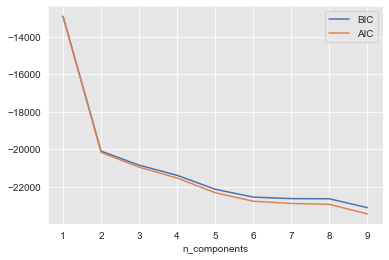

In [18]:
data = df_velocity
compute_AIC_BIC(data, 10)

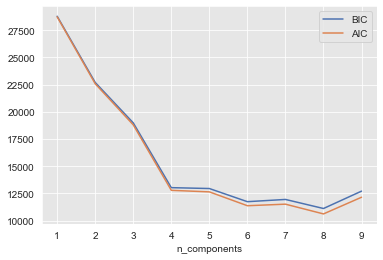

In [19]:
data = df_stresses
compute_AIC_BIC(data, 10)

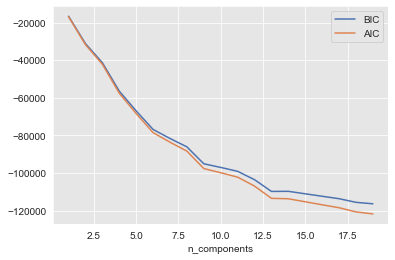

In [20]:
data = df
compute_AIC_BIC(data, 20)

In [21]:
nclusters = 8

In [22]:
algo = GaussianMixture(n_components=nclusters, init_params='kmeans', covariance_type="full", random_state=23, verbose=2).fit(data)
labels = algo.predict(data)
centers = np.empty(shape=(algo.n_components, data.shape[1]))

Initialization 0
  Iteration 10	 time lapse 0.29405s	 ll change 0.02200
  Iteration 20	 time lapse 0.14047s	 ll change 0.00963
Initialization converged: True	 time lapse 0.51786s	 ll 11.13358


In [23]:
df['labels'] = labels

/tmp/ipykernel_18163/333762363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'] = labels


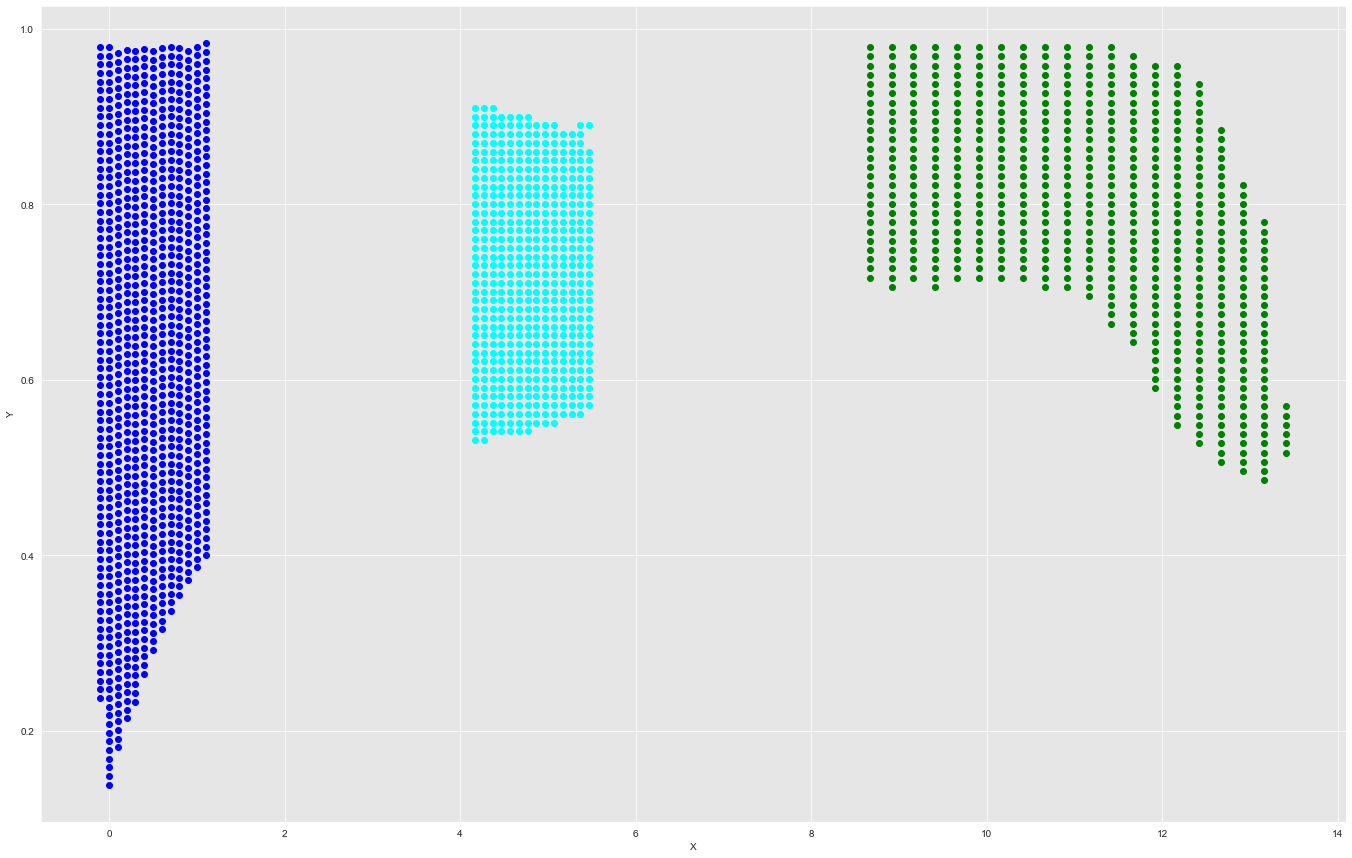

In [24]:
color=['blue', 'green', 'cyan', 'black']

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(111)

for k in range(0,3):
    db = df[df["labels"]==k]
    f = ax1.scatter(db['x/R'], db['r/R'], c=color[k])
    
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_aspect(10)
plt.show()
plt.close()

In [25]:
df

,x/R,r/R,y/R,Ux,Ur,<ux^2>,<ur^2>,<uxur>,labels
0,-0.1000,0.0099,0.9901,0.9079,0.0144,14.5002,0.8891,-3.0369,5
1,-0.1000,0.0396,0.9604,0.9206,0.0524,12.5207,2.1417,-3.4063,5
2,-0.1000,0.0495,0.9505,0.9260,0.0646,11.0438,2.6117,-3.6930,5
3,-0.1000,0.0593,0.9407,0.9342,0.0754,9.2999,2.9268,-3.8233,5
4,-0.1000,0.0692,0.9308,0.9439,0.0845,7.6858,3.1250,-3.7712,5
...,...,...,...,...,...,...,...,...,...
3995,16.6667,0.4121,0.5879,1.1540,0.0002,2.2622,0.7337,-0.4593,3
3996,16.6667,0.4016,0.5984,1.1458,-0.0007,2.3951,0.7604,-0.5144,3
3997,16.6667,0.3911,0.6089,1.1374,-0.0014,2.5382,0.7856,-0.5728,3
3998,16.6667,0.3806,0.6194,1.1285,-0.0020,2.6961,0.8061,-0.6282,3


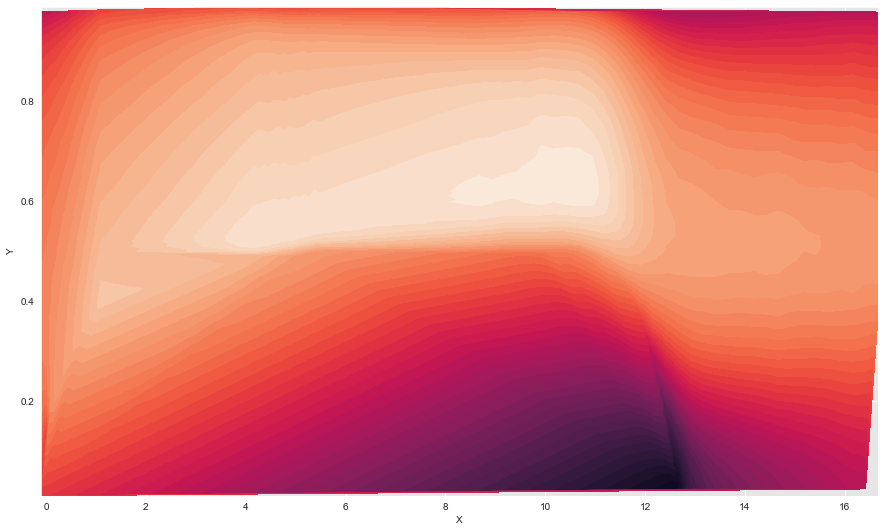

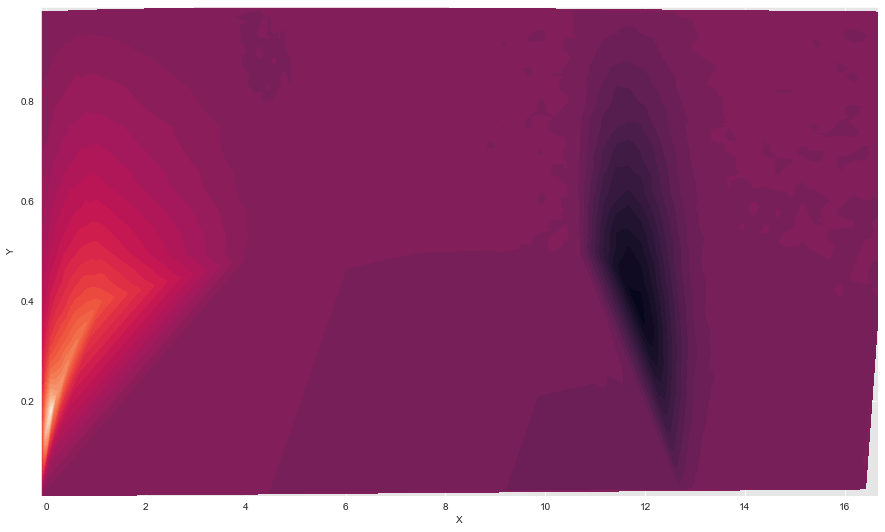

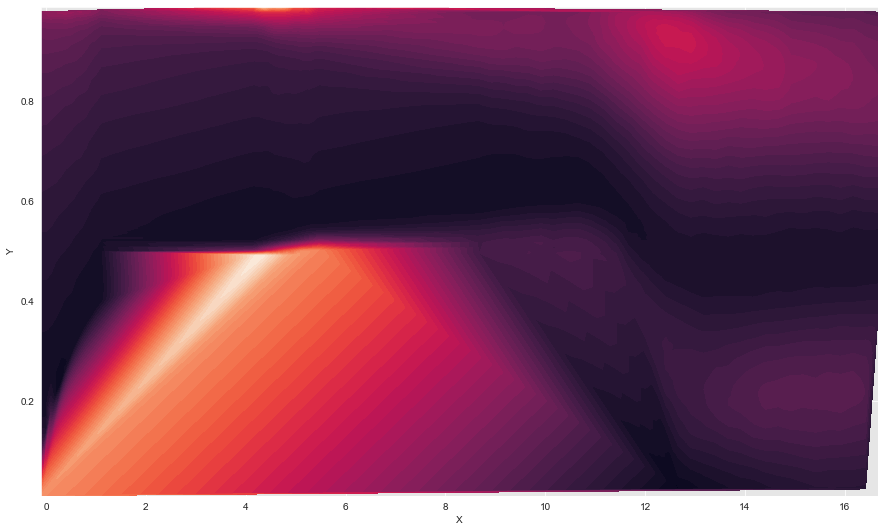

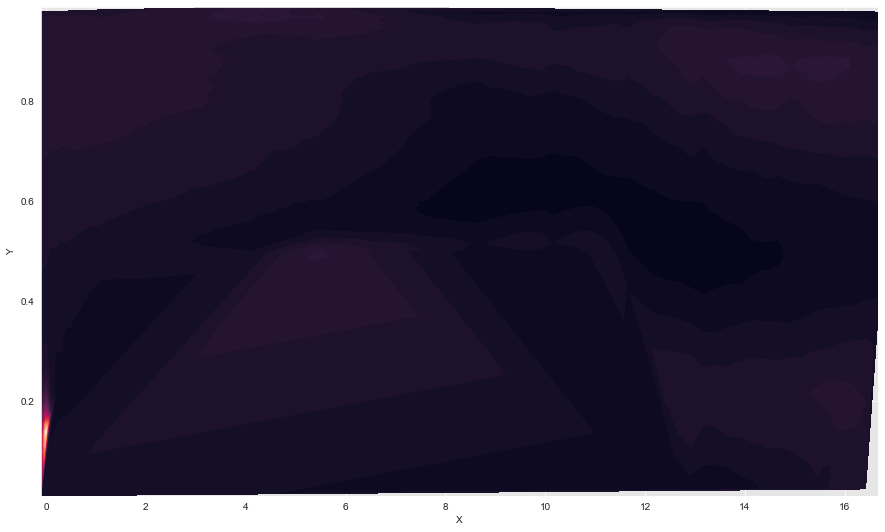

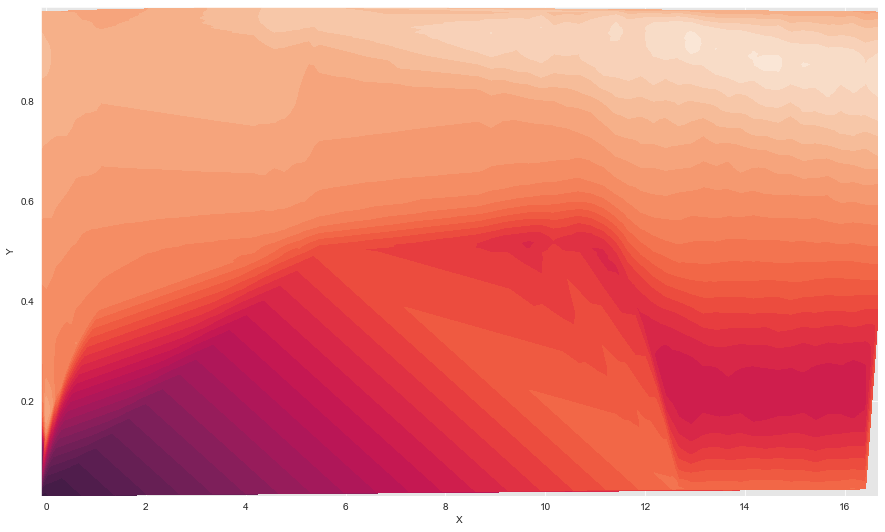

In [26]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)
f = ax1.tricontourf(df['x/R'], df['r/R'], df['Ux'], levels=50)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_aspect(10)
plt.show()
plt.close()

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)
f = ax1.tricontourf(df['x/R'], df['r/R'], df['Ur'], levels=50)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_aspect(10)
plt.show()
plt.close()

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)
f = ax1.tricontourf(df['x/R'], df['r/R'], df['<ux^2>'], levels=50)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_aspect(10)
plt.show()
plt.close()

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)
f = ax1.tricontourf(df['x/R'], df['r/R'], df['<ur^2>'], levels=50)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_aspect(10)
plt.show()
plt.close()

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)
f = ax1.tricontourf(df['x/R'], df['r/R'], df['<uxur>'], levels=50)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_aspect(10)
plt.show()
plt.close()

In [27]:
# Run K-Means
# Initializes a model object given certain parameters
model = KMeans(n_clusters=3, max_iter=5000, n_init=10, random_state=0) 

# fits the model to the raw data and predicts the cluster given to the raw data
model.fit_predict(data) 

labels_ = model.labels_

# see centroids
centers_ = model.cluster_centers_

1


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


2


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


3


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


4


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


5


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


6


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


7


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


8


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


9


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


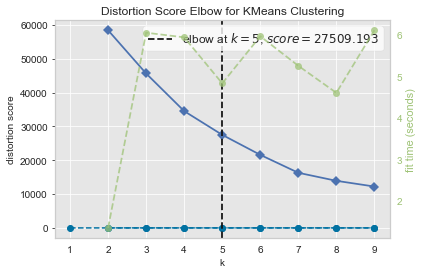

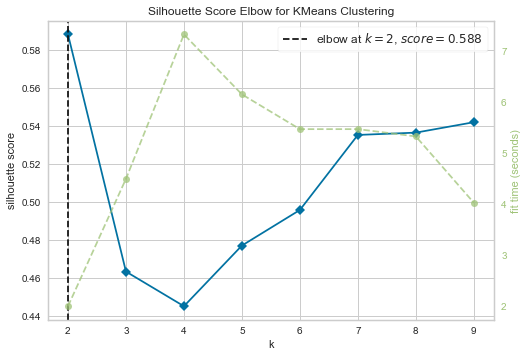

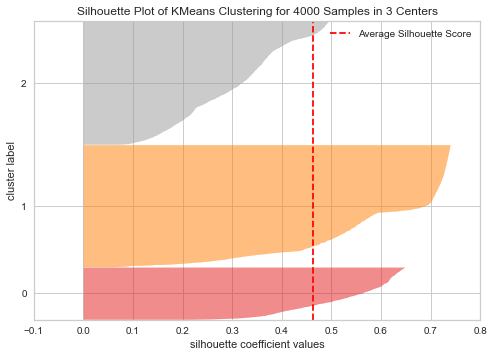

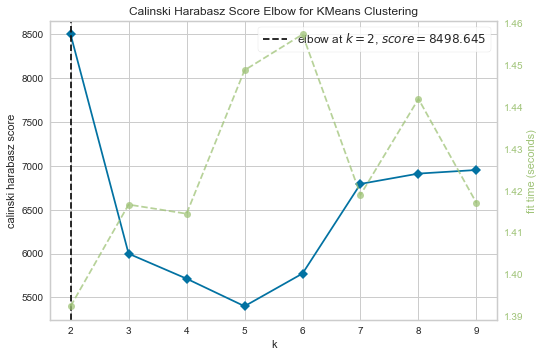

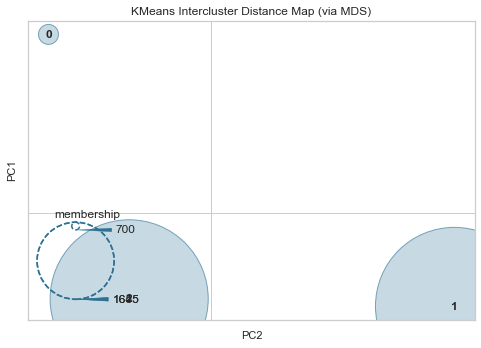

[0.81644867 0.10660438 0.06437652]
[0.81644867 0.92305305 0.98742957]
Using 3 components, we can explain 98.74295670063303% of the variability in the original data.


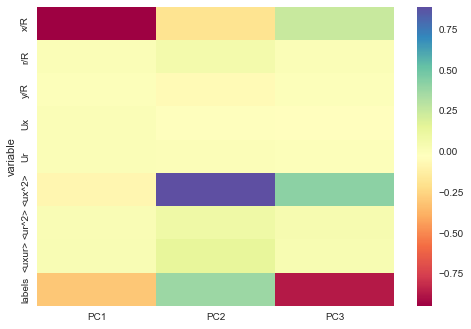

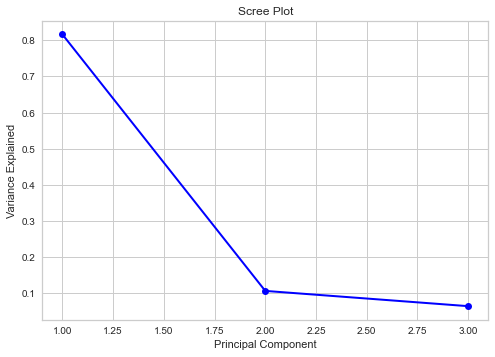

In [28]:
plot_kmeans_score(df)
find_optimal_k(df)
plot_yellowbrick(df)
compute_minimal_components(df)

1
2


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


3


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


4


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


5


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


6


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


7


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


8


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


9


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


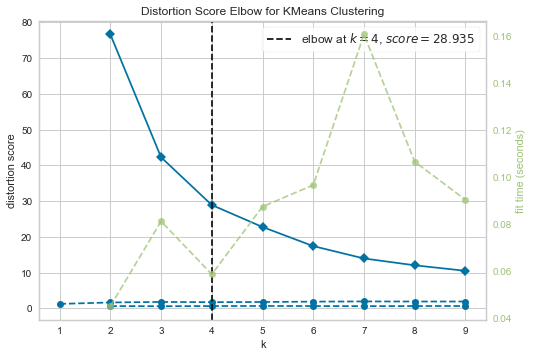

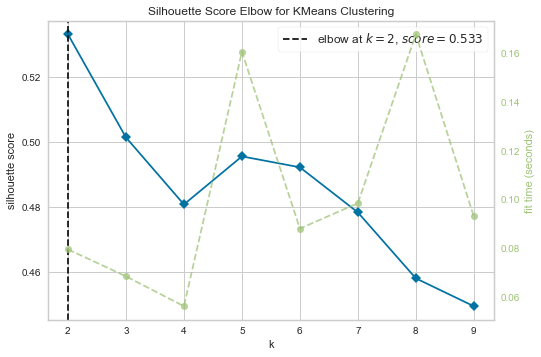

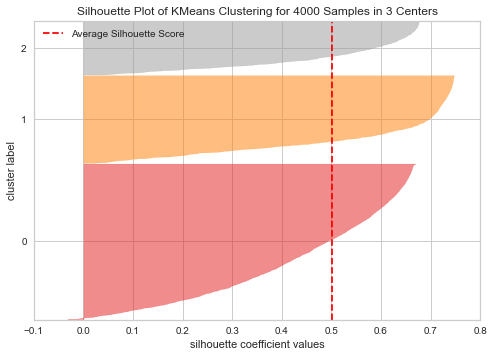

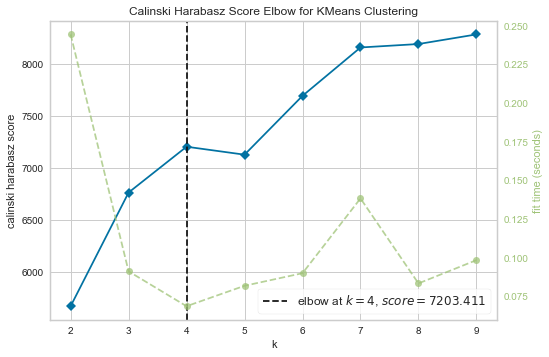

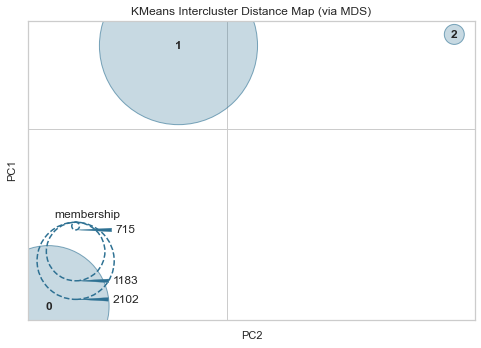

[0.93300989]
[0.93300989]
Using 1 components, we can explain 93.30098947878737% of the variability in the original data.


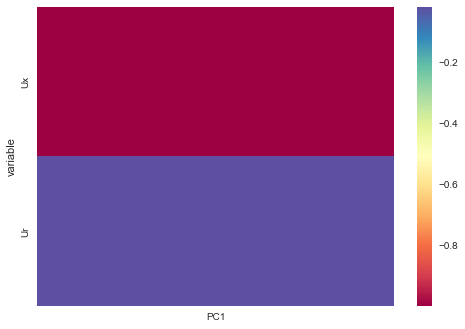

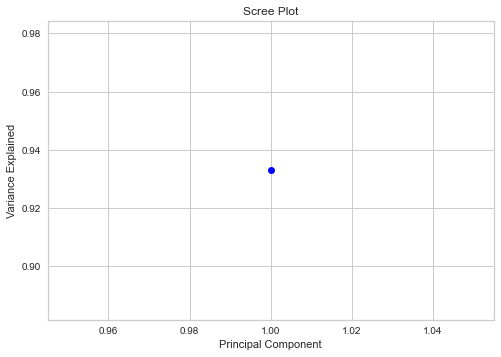

In [29]:
plot_kmeans_score(df_velocity)
find_optimal_k(df_velocity)
plot_yellowbrick(df_velocity)
compute_minimal_components(df_velocity)

1


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


2


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


3


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


4


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


5


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


6


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


7


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


8


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


9


/tmp/ipykernel_18163/3525427237.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


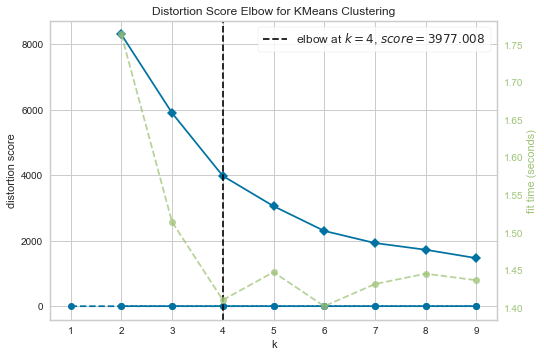

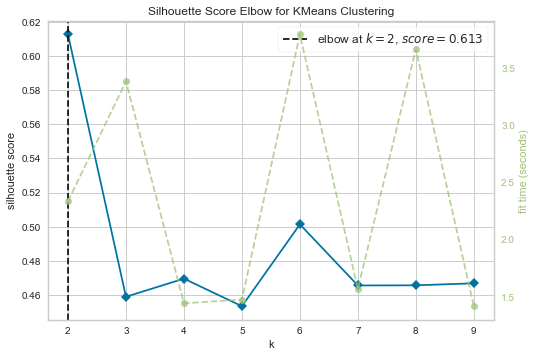

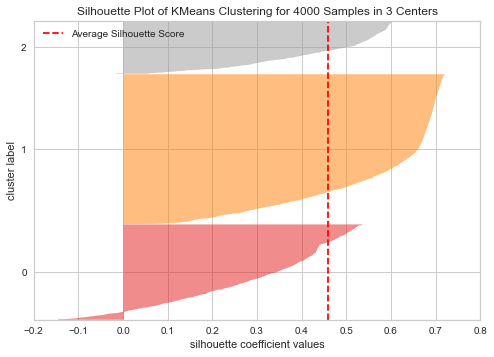

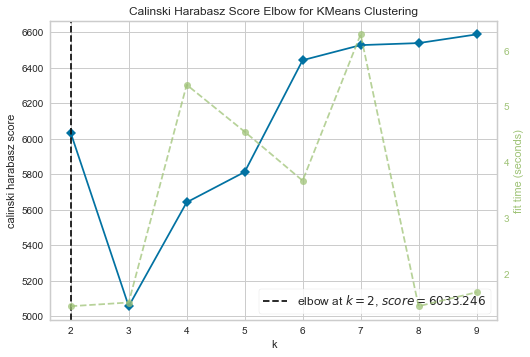

/home/unimelb.edu.au/lcampoli/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:512: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


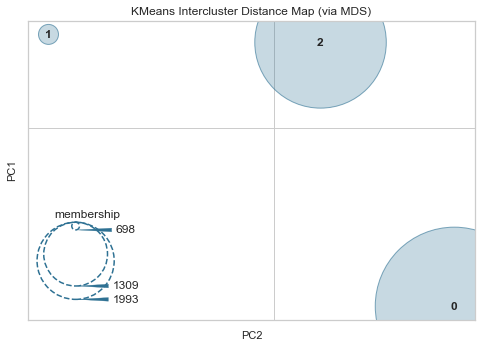

[0.8990221  0.07232354]
[0.8990221  0.97134563]
Using 2 components, we can explain 97.13456317889631% of the variability in the original data.


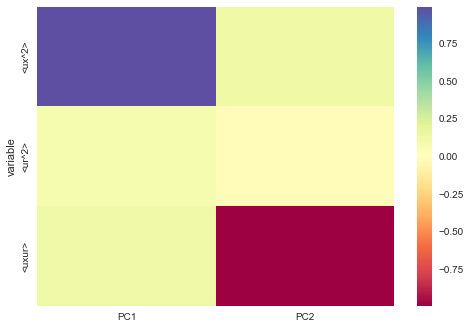

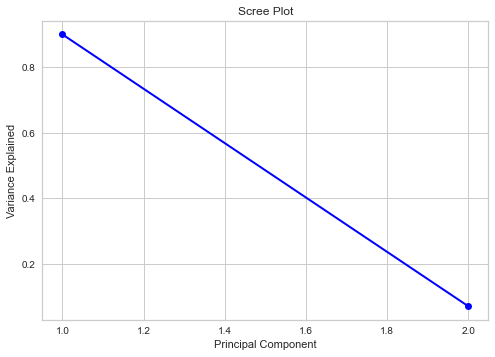

In [30]:
plot_kmeans_score(df_stresses)
find_optimal_k(df_stresses)
plot_yellowbrick(df_stresses)
compute_minimal_components(df_stresses)

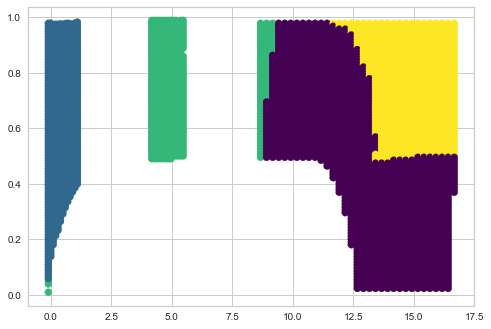

In [31]:
K = KMeans(4, random_state=0)
labels = K.fit(df)
plt.scatter(df['x/R'], df['r/R'], c=labels.labels_, s=50, cmap='viridis');

Initialization complete
Iteration 0, inertia 17704.195878810002.
Iteration 1, inertia 14821.674241405426.
Iteration 2, inertia 14654.474172138354.
Iteration 3, inertia 14614.889926002645.
Iteration 4, inertia 14609.503105496846.
Converged at iteration 4: center shift 0.00030884904093990927 within tolerance 0.0005073215706210404.
Initialization complete
Iteration 0, inertia 19575.951495910012.
Iteration 1, inertia 14419.12250590462.
Iteration 2, inertia 14073.619706301663.
Iteration 3, inertia 13962.685866585063.
Iteration 4, inertia 13924.773115206075.
Iteration 5, inertia 13922.097515694086.
Iteration 6, inertia 13921.343445765911.
Converged at iteration 6: center shift 0.00010926910684437105 within tolerance 0.0005073215706210404.
Initialization complete
Iteration 0, inertia 19752.49494896.
Iteration 1, inertia 15625.425716603371.
Iteration 2, inertia 15313.97410530693.
Iteration 3, inertia 15160.401405922265.
Iteration 4, inertia 15119.300530935614.
Iteration 5, inertia 15106.167774

IndexError: index 3 is out of bounds for axis 0 with size 3

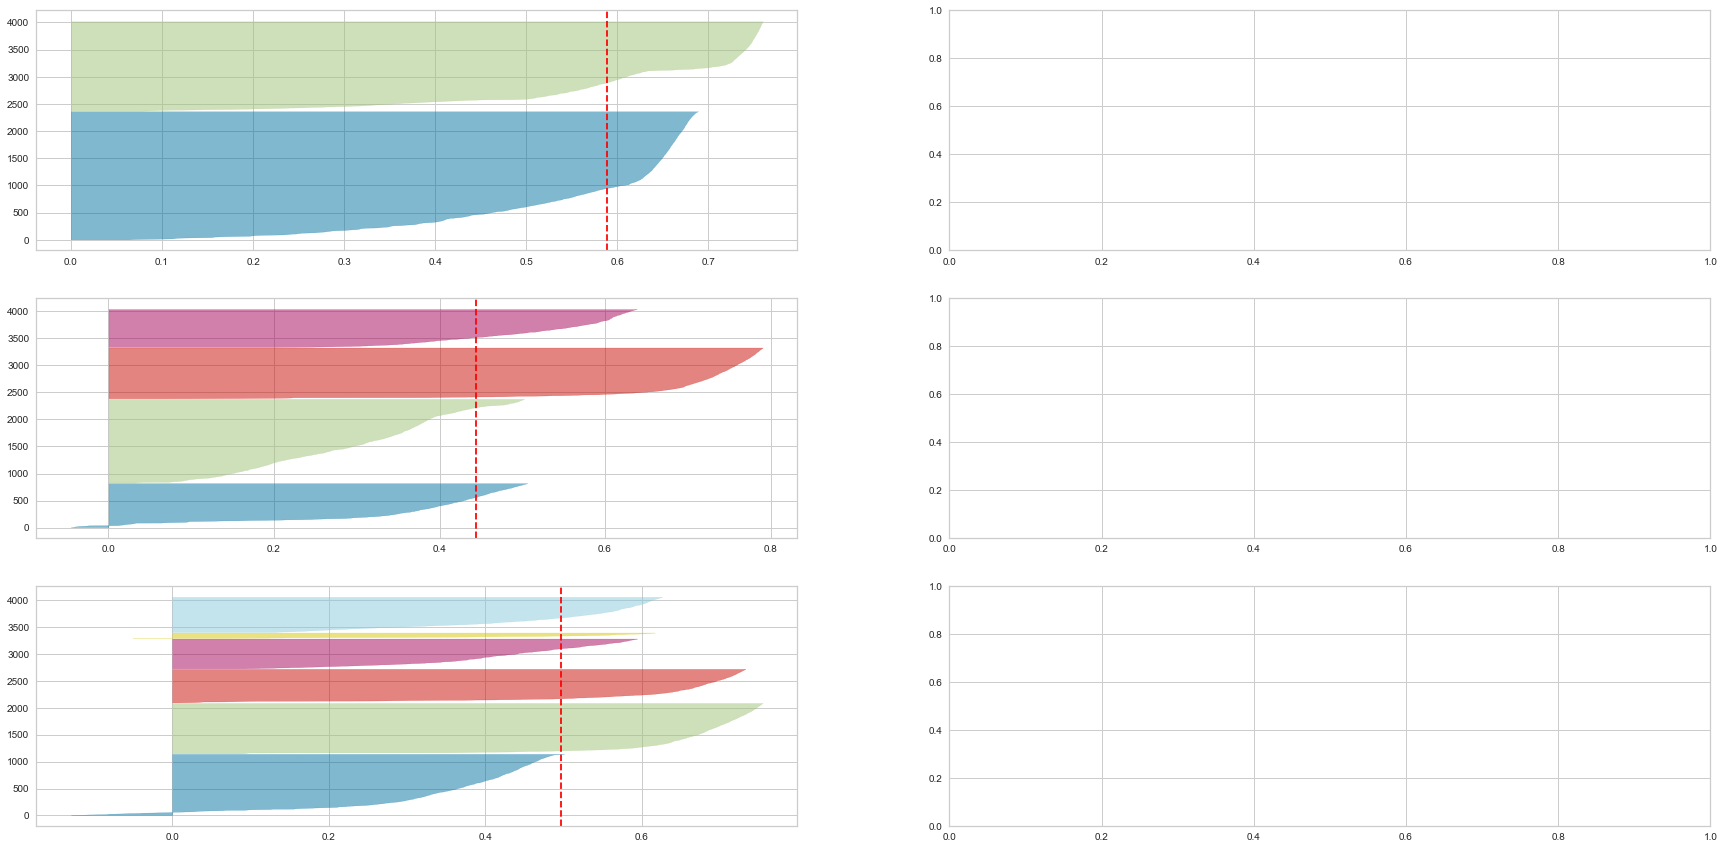

In [44]:
algo = KMeans(n_clusters=nclusters, random_state=23, verbose=2).fit(df)
labels = algo.predict(df)
        
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 2, figsize=(30,15))
for i in [2, 4, 6, 8, 10]:
    q, mod = divmod(i, 2)
    km = KMeans(n_clusters=i, random_state=42)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)
    
cluster = ['k-means_c_' + str(c) for c in labels]
fig, ax = plt.subplots()
sns.scatterplot(df['x/R'], df['r/R'], data=data.assign(cluster=labels), hue='cluster', ax=ax)
ax.set(title='K-Means Clustering');
plt.show()
plt.close()

In [33]:
algo = SpectralClustering(n_clusters=nclusters, assign_labels='discretize',  affinity='nearest_neighbors', random_state=23)
labels = algo.fit_predict(df)    

/home/unimelb.edu.au/lcampoli/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


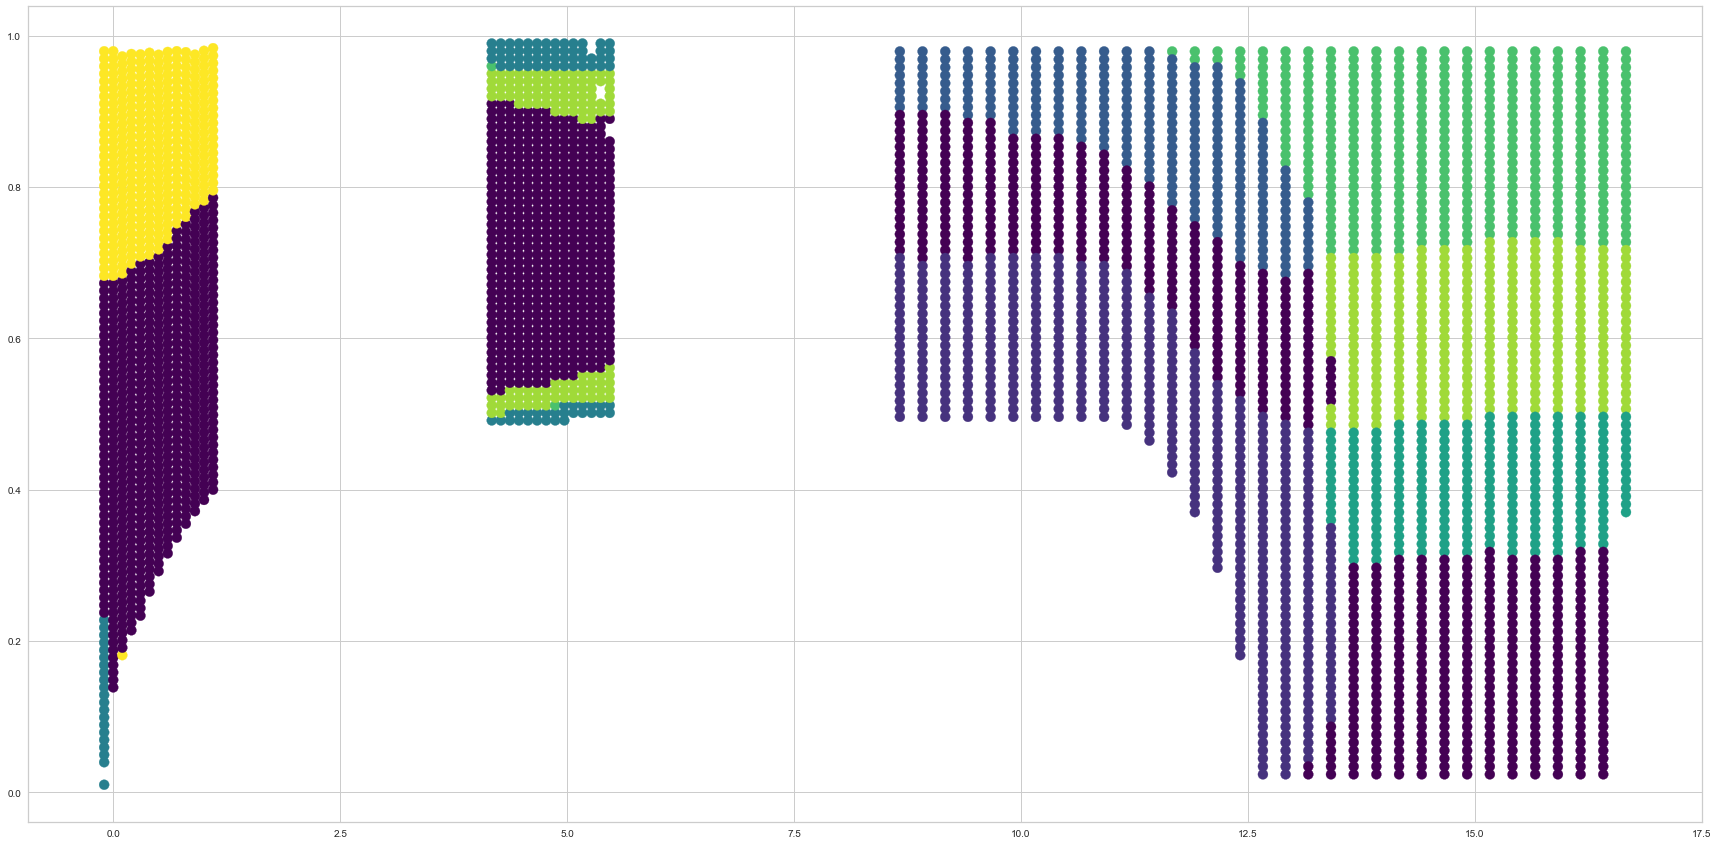

In [38]:
fig = plt.figure(figsize=(30,15))
plt.scatter(df['x/R'], df['r/R'], c=labels, s=100, cmap='viridis');